## Importing Libraries

In [1]:
%matplotlib inline 

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


## Loading csv files and reading with pandas

In [2]:
# (encoding = "ISO-8859-1") used to avoid encoding errors.
# four files will be uploaded for salary and statistics
stats18 = pd.read_csv("player_stats_18.csv", encoding = "ISO-8859-1" )
stats19 = pd.read_csv("player_stats_19.csv", encoding = "ISO-8859-1" )
salary18 = pd.read_csv('player_salary_18.csv', encoding= "ISO-8859-1")
salary19 = pd.read_csv('player_salary_19.csv', encoding= "ISO-8859-1")

In [3]:
#These are the players called rookie, who will be dropped from the actual list if they have 3 or less years experience
#because these players have 3=years-rookie contracts even if they are having high points for each game, 
#their salaries won't be reflecting reality.
files = ['drafted_players_19.csv', 'drafted_players_18.csv', 'drafted_players_17.csv', 'drafted_players_16.csv']
df =[]
for file in files:
    data = pd.read_csv(file, encoding = "ISO-8859-1", header=1)
    df.append(data)
drafted = pd.concat(df)
drafted = drafted[['Player', 'Yrs']]
drafted.dropna(how='any', inplace=True)
drafted = drafted[drafted['Yrs'] < 4]
drafted.Yrs.count() #number of players that still have rookie contracts which we need to drop from our lists.

193

In [4]:
stats18.head() # lets see the top 5 rows of 2018 stats

,Player,username,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Álex Abrines,abrinal01,25,OKC,31,2,19.0,1.8,5.1,0.357,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,Quincy Acy,acyqu01,28,PHO,10,0,12.3,0.4,1.8,0.222,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,Jaylen Adams,adamsja01,22,ATL,34,1,12.6,1.1,3.2,0.345,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,Steven Adams,adamsst01,25,OKC,80,80,33.4,6.0,10.1,0.595,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,Bam Adebayo,adebaba01,21,MIA,82,28,23.3,3.4,5.9,0.576,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9


In [5]:
stats19.head() # lets see the top 5 rows of 2019 stats

,Rk,Player,username,Pos,Age,Tm,G,GS,MP,FG,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Steven Adams,adamsst01,C,26,OKC,58,58,27.0,4.5,...,0.590,3.4,6.0,9.4,2.4,0.9,1.1,1.5,1.9,10.9
1,2,Bam Adebayo,adebaba01,PF,22,MIA,65,65,34.4,6.3,...,0.690,2.5,8.0,10.5,5.1,1.2,1.3,2.8,2.5,16.2
2,3,LaMarcus Aldridge,aldrila01,C,34,SAS,53,53,33.1,7.4,...,0.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,4,Nickeil Alexander-Walker,alexani01,SG,21,NOP,41,0,12.2,1.9,...,0.607,0.2,1.8,2.0,1.8,0.3,0.2,1.0,1.1,5.1
4,5,Grayson Allen,allengr01,SG,24,MEM,30,0,16.6,2.6,...,0.857,0.2,2.0,2.2,1.4,0.2,0.0,0.8,1.2,7.4


In [6]:
salary18.head() # lets see the top 5 rows of 2018 player salaries

,Rk,Player,Pos,Team,Salary 2018-19
0,1,Stephen Curry,PG,Golden State Warriors,"$37,457,154"
1,2,Chris Paul,PG,Houston Rockets,"$35,654,150"
2,3,LeBron James,SF,Los Angeles Lakers,"$35,654,150"
3,4,Russell Westbrook,PG,Oklahoma City Thunder,"$35,654,150"
4,5,Blake Griffin,PF,Detroit Pistons,"$32,088,932"


In [7]:
salary19.head() # lets see the top 5 rows of 2019 player salaries

,Rk,Player,Username,Salary 2019-20
0,1,Stephen Curry,curryst01,"$40,231,758"
1,2,Chris Paul,paulch01,"$38,506,482"
2,3,Russell Westbrook,westbru01,"$38,178,000"
3,4,John Wall,walljo01,"$37,800,000"
4,5,James Harden,hardeja01,"$37,800,000"


In [8]:
#Selecting the rows we will be using from salary files
salary18 = salary18[['Player', 'Salary 2018-19']]
salary18.head()

,Player,Salary 2018-19
0,Stephen Curry,"$37,457,154"
1,Chris Paul,"$35,654,150"
2,LeBron James,"$35,654,150"
3,Russell Westbrook,"$35,654,150"
4,Blake Griffin,"$32,088,932"


In [9]:
salary19 = salary19[['Player', 'Salary 2019-20']]
salary19.head()

,Player,Salary 2019-20
0,Stephen Curry,"$40,231,758"
1,Chris Paul,"$38,506,482"
2,Russell Westbrook,"$38,178,000"
3,John Wall,"$37,800,000"
4,James Harden,"$37,800,000"


In [10]:
df18 = pd.merge(stats18, salary18, on='Player') # Merging 2018 player salary with their stats
df18.head()

,Player,username,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary 2018-19
0,Jaylen Adams,adamsja01,22,ATL,34,1,12.6,1.1,3.2,0.345,...,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2,"$270,014"
1,Steven Adams,adamsst01,25,OKC,80,80,33.4,6.0,10.1,0.595,...,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9,"$24,157,303"
2,Bam Adebayo,adebaba01,21,MIA,82,28,23.3,3.4,5.9,0.576,...,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9,"$2,955,840"
3,LaMarcus Aldridge,aldrila01,33,SAS,81,81,33.2,8.4,16.3,0.519,...,3.1,6.1,9.2,2.4,0.5,1.3,1.8,2.2,21.3,"$22,347,015"
4,Grayson Allen,allengr01,23,UTA,38,2,10.9,1.8,4.7,0.376,...,0.1,0.5,0.6,0.7,0.2,0.2,0.9,1.2,5.6,"$2,074,320"


In [11]:
df19 = pd.merge(stats19, salary19, on='Player') # Merging 2019 player salary with their stats
df19.head()

,Rk,Player,username,Pos,Age,Tm,G,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary 2019-20
0,1,Steven Adams,adamsst01,C,26,OKC,58,58,27.0,4.5,...,3.4,6.0,9.4,2.4,0.9,1.1,1.5,1.9,10.9,"$25,842,697"
1,2,Bam Adebayo,adebaba01,PF,22,MIA,65,65,34.4,6.3,...,2.5,8.0,10.5,5.1,1.2,1.3,2.8,2.5,16.2,"$3,454,080"
2,3,LaMarcus Aldridge,aldrila01,C,34,SAS,53,53,33.1,7.4,...,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9,"$26,000,000"
3,4,Nickeil Alexander-Walker,alexani01,SG,21,NOP,41,0,12.2,1.9,...,0.2,1.8,2.0,1.8,0.3,0.2,1.0,1.1,5.1,"$2,964,840"
4,5,Grayson Allen,allengr01,SG,24,MEM,30,0,16.6,2.6,...,0.2,2.0,2.2,1.4,0.2,0.0,0.8,1.2,7.4,"$2,429,400"


In [14]:
df18['Salary 2018-19'] = df18['Salary 2018-19'].replace({'\$': '', ',': ''}, regex=True)
df18['Salary 2018-19'] = pd.to_numeric(df18['Salary 2018-19'])

In [15]:
df19['Salary 2019-20'] = df19['Salary 2019-20'].replace({'\$': '', ',': ''}, regex=True)
df19['Salary 2019-20'] = pd.to_numeric(df19['Salary 2019-20'])

In [16]:
df19.corr()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary 2019-20
Rk,1.000000,-0.046024,-0.010621,-0.008932,-0.012812,0.010619,0.018780,-0.043472,0.015004,0.006685,...,-0.068124,-0.076612,-0.078283,0.067264,-0.013582,-0.063533,0.028381,-0.030192,0.011791,-0.008241
Age,-0.046024,1.000000,0.057184,0.017099,0.147779,0.054204,0.069412,-0.007215,0.195181,0.188349,...,-0.006060,0.113111,0.082326,0.094731,0.092327,0.043608,0.044783,0.101154,0.074716,0.302888
G,-0.010621,0.057184,1.000000,0.604279,0.589924,0.494290,0.469113,0.304131,0.349225,0.323928,...,0.287779,0.408619,0.395705,0.378101,0.414662,0.225235,0.386592,0.397219,0.481233,0.243412
GS,-0.008932,0.017099,0.604279,1.000000,0.758465,0.705317,0.689750,0.200475,0.450382,0.449198,...,0.383968,0.615417,0.581900,0.561933,0.562109,0.320762,0.623176,0.537973,0.694871,0.490858
MP,-0.012812,0.147779,0.589924,0.758465,1.000000,0.879885,0.887615,0.256525,0.680691,0.687891,...,0.403189,0.717512,0.664531,0.697322,0.720174,0.363968,0.777847,0.726376,0.880164,0.579945
FG,0.010619,0.054204,0.494290,0.705317,0.879885,1.000000,0.974202,0.318208,0.648298,0.647880,...,0.432704,0.705567,0.665132,0.717745,0.622696,0.362081,0.863074,0.607198,0.988251,0.623950
FGA,0.018780,0.069412,0.469113,0.689750,0.887615,0.974202,1.000000,0.168051,0.741657,0.761255,...,0.298138,0.637525,0.572910,0.752312,0.625899,0.263817,0.861617,0.561321,0.982478,0.627232
FG%,-0.043472,-0.007215,0.304131,0.200475,0.256525,0.318208,0.168051,1.000000,-0.019054,-0.096534,...,0.495060,0.349753,0.414508,0.084713,0.150048,0.385485,0.220004,0.397268,0.265744,0.112198
3P,0.015004,0.195181,0.349225,0.450382,0.680691,0.648298,0.741657,-0.019054,1.000000,0.977430,...,-0.141383,0.284706,0.173405,0.528071,0.421834,-0.020935,0.541952,0.343222,0.713038,0.412471
3PA,0.006685,0.188349,0.323928,0.449198,0.687891,0.647880,0.761255,-0.096534,0.977430,1.000000,...,-0.149345,0.295501,0.179106,0.554698,0.441781,-0.021984,0.563936,0.343134,0.716133,0.437358


In [17]:
df18.corr()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary 2018-19
Age,1.000000,0.002521,0.004966,0.096289,0.013577,0.029973,0.029668,0.140421,0.130922,0.095472,...,-0.035060,0.076783,0.045630,0.112805,0.049109,-0.020419,0.023406,0.047202,0.040793,0.294346
G,0.002521,1.000000,0.605850,0.545972,0.491053,0.465401,0.291980,0.345856,0.327112,0.118044,...,0.225513,0.353825,0.336073,0.356567,0.367603,0.283607,0.400937,0.389213,0.478204,0.283360
GS,0.004966,0.605850,1.000000,0.767034,0.712529,0.698116,0.217698,0.478308,0.466200,0.135278,...,0.345839,0.567613,0.534467,0.537928,0.563176,0.402745,0.628086,0.529714,0.704734,0.517213
MP,0.096289,0.545972,0.767034,1.000000,0.860687,0.879409,0.223841,0.657703,0.666004,0.224624,...,0.344775,0.651857,0.595638,0.652673,0.739344,0.397834,0.750798,0.687057,0.863054,0.552904
FG,0.013577,0.491053,0.712529,0.860687,1.000000,0.972019,0.342145,0.577997,0.577251,0.188045,...,0.422142,0.678309,0.640771,0.638606,0.618138,0.416876,0.822209,0.577038,0.989507,0.570141
FGA,0.029973,0.465401,0.698116,0.879409,0.972019,1.000000,0.177339,0.694343,0.710295,0.206498,...,0.276761,0.592600,0.530055,0.678915,0.645138,0.312428,0.826048,0.535876,0.980022,0.570308
FG%,0.029668,0.291980,0.217698,0.223841,0.342145,0.177339,1.000000,-0.113940,-0.179854,0.179617,...,0.510579,0.407328,0.467266,0.064801,0.120162,0.401252,0.190546,0.334449,0.289214,0.128002
3P,0.140421,0.345856,0.478308,0.657703,0.577997,0.694343,-0.113940,1.000000,0.981861,0.434497,...,-0.213045,0.188430,0.070446,0.430675,0.460779,-0.029937,0.447896,0.279607,0.645471,0.384909
3PA,0.130922,0.327112,0.466200,0.666004,0.577251,0.710295,-0.179854,0.981861,1.000000,0.350345,...,-0.228645,0.181499,0.060352,0.460200,0.483884,-0.028440,0.476074,0.281504,0.646496,0.389979
3P%,0.095472,0.118044,0.135278,0.224624,0.188045,0.206498,0.179617,0.434497,0.350345,1.000000,...,-0.163771,0.056338,-0.009172,0.129441,0.075901,-0.080193,0.092053,0.077795,0.214815,0.073195


#### Removing the '$' signs and commas from the salary columns

In [96]:
df18['Salary 2018-19'].head()

0      270014
1    24157303
2     2955840
3    22347015
4     2074320
Name: Salary 2018-19, dtype: int64

In [97]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578 entries, 0 to 577
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player          578 non-null    object 
 1   username        578 non-null    object 
 2   Age             578 non-null    int64  
 3   Tm              578 non-null    object 
 4   G               578 non-null    int64  
 5   GS              578 non-null    int64  
 6   MP              578 non-null    float64
 7   FG              578 non-null    float64
 8   FGA             578 non-null    float64
 9   FG%             576 non-null    float64
 10  3P              578 non-null    float64
 11  3PA             578 non-null    float64
 12  3P%             550 non-null    float64
 13  2P              578 non-null    float64
 14  2PA             578 non-null    float64
 15  2P%             572 non-null    float64
 16  eFG%            576 non-null    float64
 17  FT              578 non-null    flo

## Cleaning data


In [98]:
df.columns # The columns we have in our df

Index(['Player', 'username', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [100]:
# dropping come solumns that we won't use

df1 = df1.drop(['username', 'GS', 'FG', 'FGA', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'BLK', 'TOV', 'PF'], axis=1)

In [101]:
df1.describe() # to see the summary of statistics pertaining to the DataFrame(df) columns

,Age,G,MP,FG%,3P,TRB,AST,STL,PTS,Salary 2018-19
count,578.000000,578.000000,578.000000,576.000000,578.000000,578.000000,578.000000,578.000000,578.000000,5.780000e+02
mean,26.397924,46.968858,20.552595,0.439396,0.950519,3.759689,1.991176,0.649308,8.952768,6.709582e+06
std,4.257011,24.732729,8.530171,0.096904,0.778686,2.450647,1.676499,0.417479,5.798052,7.763380e+06
min,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.737000e+03
25%,23.000000,26.000000,14.100000,0.401750,0.325000,2.000000,0.900000,0.300000,4.800000,1.512601e+06
50%,26.000000,49.000000,20.250000,0.433000,0.850000,3.200000,1.400000,0.600000,7.600000,3.165580e+06
75%,29.000000,69.000000,27.375000,0.480000,1.400000,4.775000,2.575000,0.900000,11.800000,9.907812e+06
max,42.000000,82.000000,36.900000,1.000000,5.100000,15.600000,10.700000,2.400000,36.100000,3.745715e+07


In [102]:
df1.info() #information about the dataframe including the data types of each column and memory usage of the entire data.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578 entries, 0 to 577
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player          578 non-null    object 
 1   Age             578 non-null    int64  
 2   Tm              578 non-null    object 
 3   G               578 non-null    int64  
 4   MP              578 non-null    float64
 5   FG%             576 non-null    float64
 6   3P              578 non-null    float64
 7   TRB             578 non-null    float64
 8   AST             578 non-null    float64
 9   STL             578 non-null    float64
 10  PTS             578 non-null    float64
 11  Salary 2018-19  578 non-null    int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 58.7+ KB


In [104]:
df1[['Player', 'Age', 'Tm', 'G', 'MP', 'FG%', 'TRB', 'AST', 'PTS', '3P', 'STL', 'Salary 2018-19']].isnull().sum()  #finding whih columns has null values

Player            0
Age               0
Tm                0
G                 0
MP                0
FG%               2
TRB               0
AST               0
PTS               0
3P                0
STL               0
Salary 2018-19    0
dtype: int64

In [105]:
# getting rid of rows that has null values
df1.dropna(how='any', inplace=True)
len(df1)

576

In [106]:
# to see if we have any duplicate entries ( which are most probably because of changing team during mid-season)
number_of_duplicated_names= len(df)-df['Player'].nunique()
number_of_duplicated_names


178

In [107]:
# getting the means of the stats for duplicated names and then dropping them

#df = df.groupby(['Player']).agg({'Age' : 'mean', 'G' : 'mean', 'MP' : 'mean', 'FG%' : 'mean' ,
                                 # 'TRB' : 'mean', 'AST' : 'mean', 'PTS' : 'mean'
                                 #   })
#df.describe()

In [109]:
df2 = df[(df.Age >= 24) & (df1.Age <= 38)]
df2 = df1[df1.G >= 15]
df2.head()

,Player,Age,Tm,G,MP,FG%,3P,TRB,AST,STL,PTS,Salary 2018-19
0,Jaylen Adams,22,ATL,34,12.6,0.345,0.7,1.8,1.9,0.4,3.2,270014
1,Steven Adams,25,OKC,80,33.4,0.595,0.0,9.5,1.6,1.5,13.9,24157303
2,Bam Adebayo,21,MIA,82,23.3,0.576,0.0,7.3,2.2,0.9,8.9,2955840
3,LaMarcus Aldridge,33,SAS,81,33.2,0.519,0.1,9.2,2.4,0.5,21.3,22347015
4,Grayson Allen,23,UTA,38,10.9,0.376,0.8,0.6,0.7,0.2,5.6,2074320


In [111]:
df2 = df1.sort_values('Salary 2018-19').tail(300)

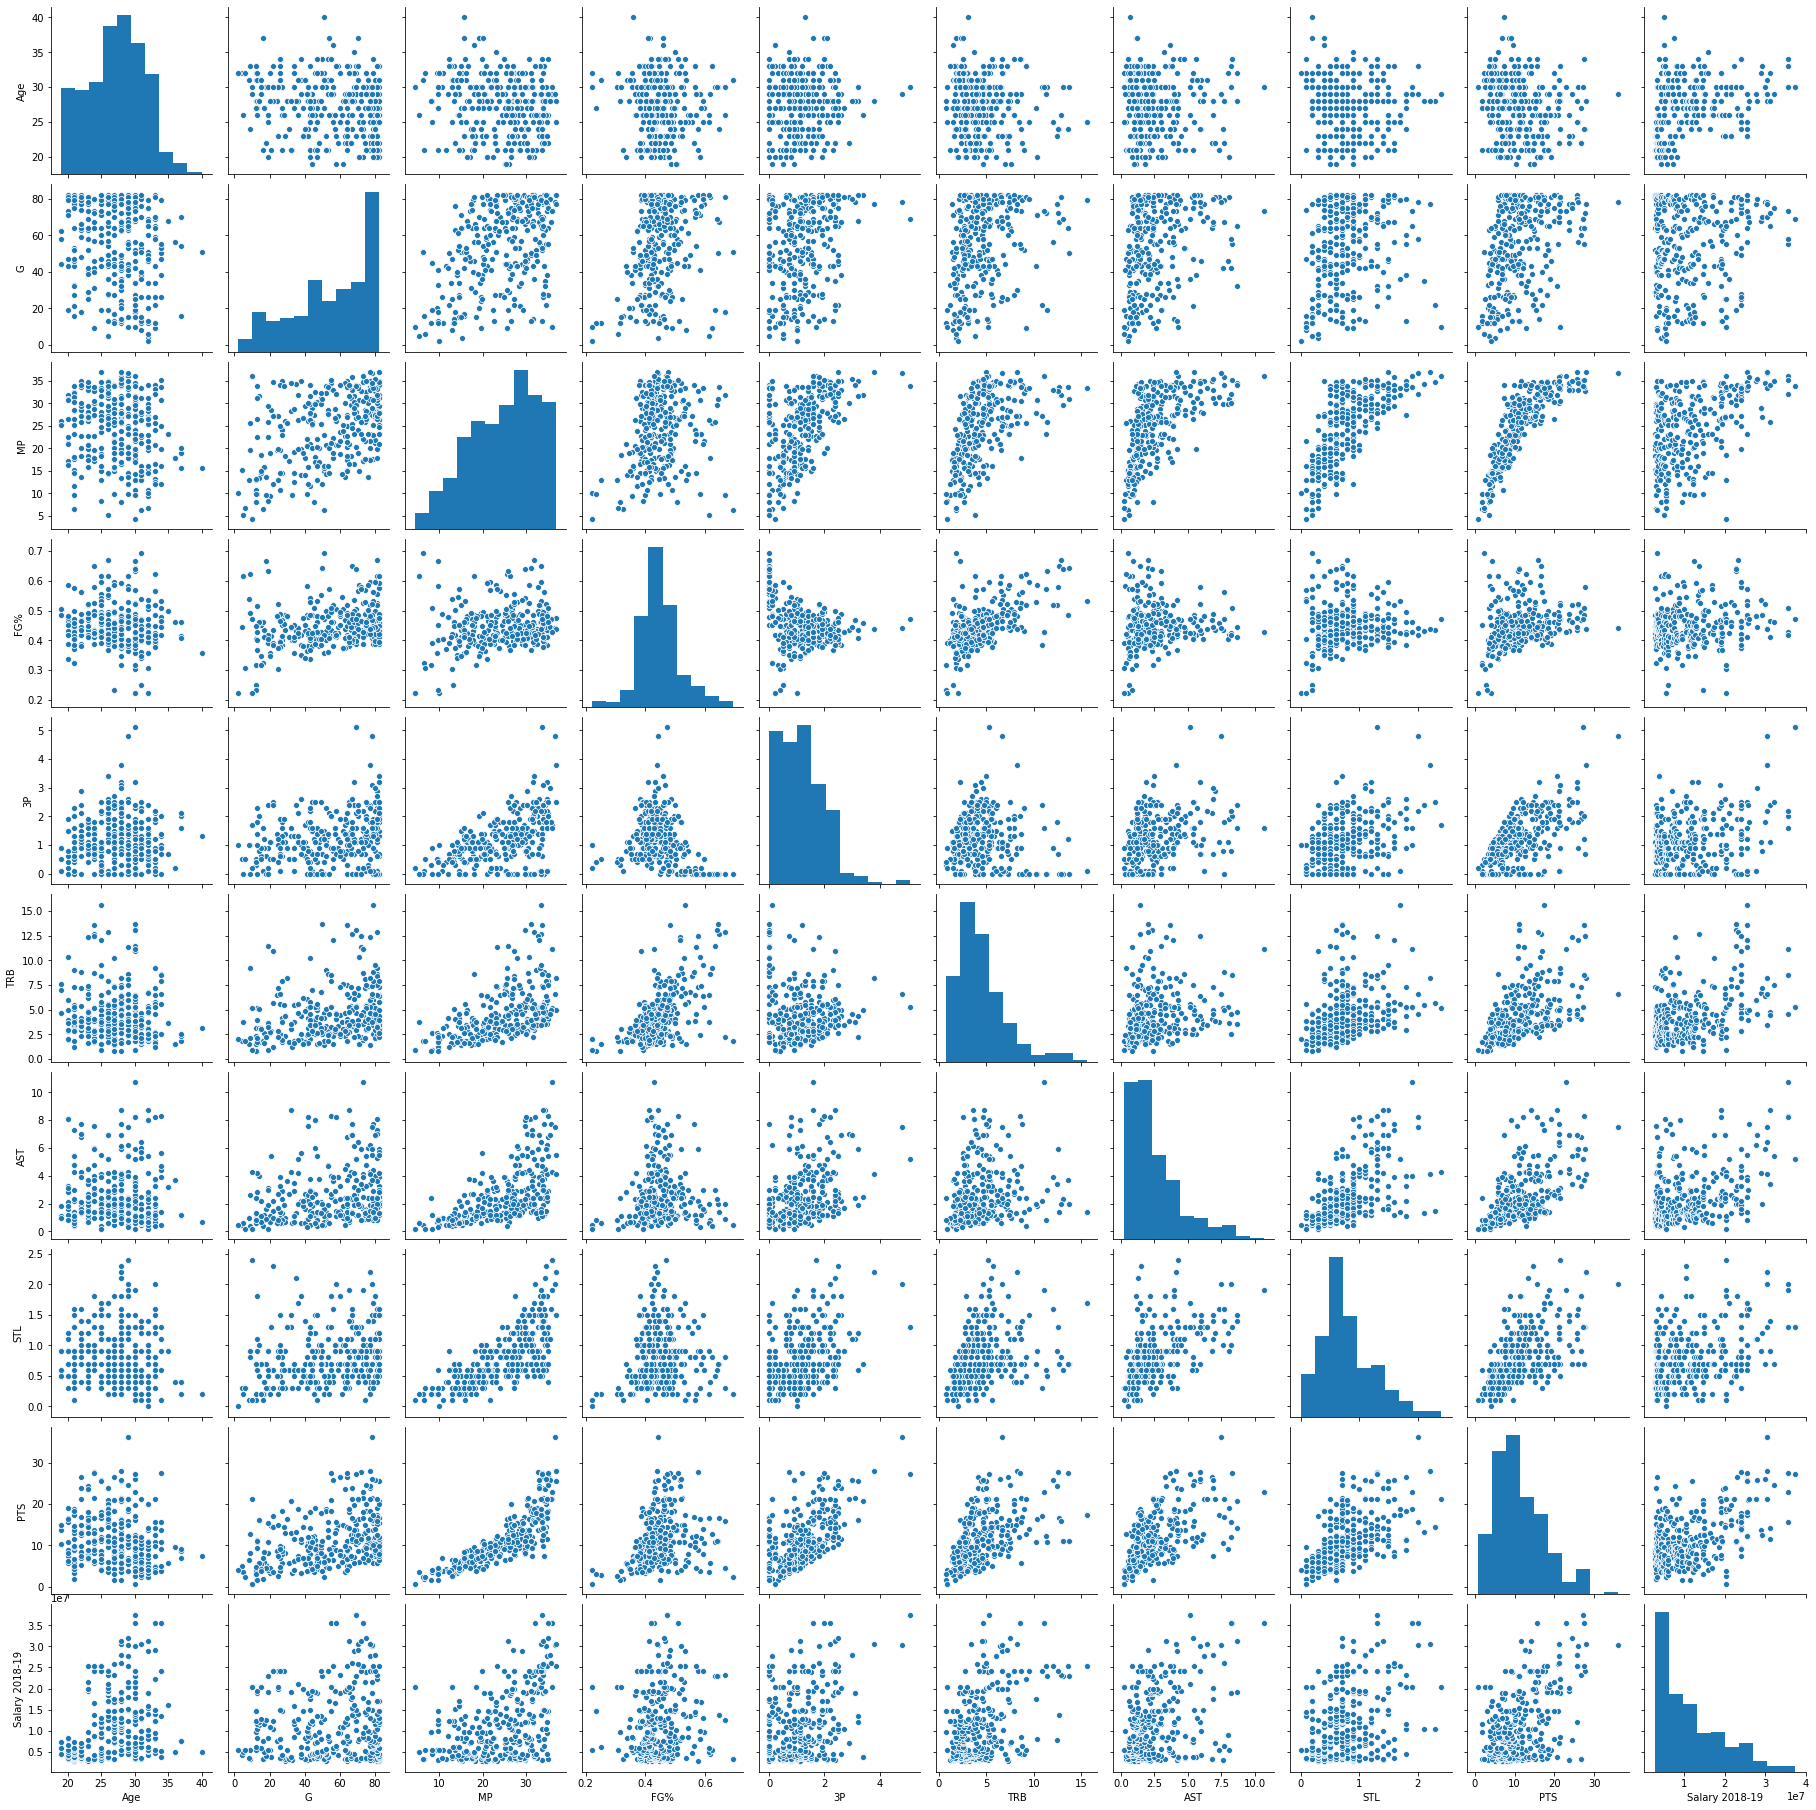

In [112]:
sns.pairplot(df2)

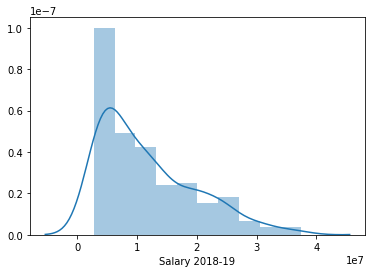

In [114]:
sns.distplot(df2['Salary 2018-19'])

In [121]:
sns.heatmap(df2.corr(), annot = True, cmap='BuPu', ax=axes[0,0])
df2.plot(ax=axes[0,1])

NameError: name 'axes' is not defined

In [116]:
df2.corr()

,Age,G,MP,FG%,3P,TRB,AST,STL,PTS,Salary 2018-19
Age,1.000000,-0.153721,-0.139964,-0.069068,0.032433,-0.085456,-0.022927,-0.086174,-0.178974,0.295722
G,-0.153721,1.000000,0.452817,0.278067,0.248318,0.296098,0.262808,0.247903,0.413364,0.119327
MP,-0.139964,0.452817,1.000000,0.200796,0.567635,0.536699,0.606050,0.709388,0.830967,0.456528
FG%,-0.069068,0.278067,0.200796,1.000000,-0.287924,0.570962,0.044135,0.093021,0.263301,0.155483
3P,0.032433,0.248318,0.567635,-0.287924,1.000000,-0.044928,0.353720,0.401585,0.593911,0.259825
TRB,-0.085456,0.296098,0.536699,0.570962,-0.044928,1.000000,0.203717,0.327505,0.528679,0.427148
AST,-0.022927,0.262808,0.606050,0.044135,0.353720,0.203717,1.000000,0.575584,0.613162,0.413734
STL,-0.086174,0.247903,0.709388,0.093021,0.401585,0.327505,0.575584,1.000000,0.573866,0.343546
PTS,-0.178974,0.413364,0.830967,0.263301,0.593911,0.528679,0.613162,0.573866,1.000000,0.504900
Salary 2018-19,0.295722,0.119327,0.456528,0.155483,0.259825,0.427148,0.413734,0.343546,0.504900,1.000000


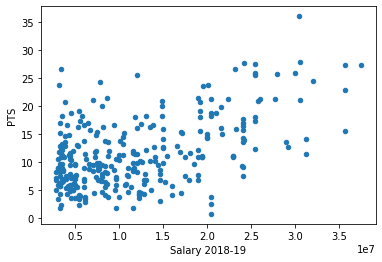

In [117]:
df2.plot(x='Salary 2018-19', y='PTS', kind='scatter')

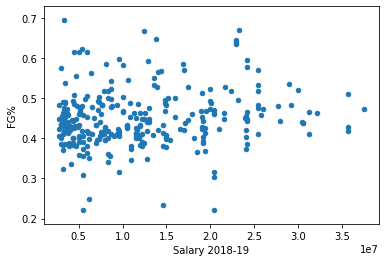

In [119]:
df2.plot(x='Salary 2018-19', y='FG%', kind='scatter')

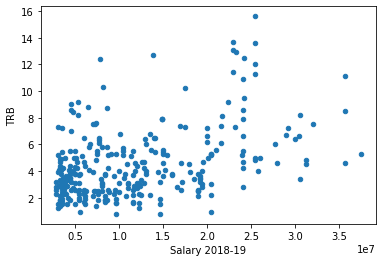

In [120]:
df2.plot(x='Salary 2018-19', y='TRB', kind='scatter')

In [ ]:
df2.plot(x='Salary 2018-19', y='PTS', kind='scatter')

In [118]:
df2.tail()

,Player,Age,Tm,G,MP,FG%,3P,TRB,AST,STL,PTS,Salary 2018-19
221,Blake Griffin,29,DET,75,35.0,0.462,2.5,7.5,5.4,0.7,24.5,32088932
549,Russell Westbrook,30,OKC,73,36.0,0.428,1.6,11.1,10.7,1.9,22.9,35654150
279,LeBron James,34,LAL,55,35.2,0.510,2.0,8.5,8.3,1.3,27.4,35654150
438,Chris Paul,33,HOU,58,32.0,0.419,2.2,4.6,8.2,2.0,15.6,35654150
136,Stephen Curry,30,GSW,69,33.8,0.472,5.1,5.3,5.2,1.3,27.3,37457154
